In [139]:
import json
import pandas as pd

# Assuming you have a file named 'example.json' in the same directory as your script
file_path = 'instance_depart/huge.json'

# Open the file in read mode
with open(file_path, 'r') as file:
    # Load the JSON data from the file
    data = json.load(file)


In [140]:
from sklearn.cluster import KMeans
import numpy as np

def turbines_cluster(data, n_clusters):
    idxy = pd.DataFrame().from_dict(data['wind_turbines'])
    id = idxy['id'].to_numpy()
    x = idxy[['x']].to_numpy()
    y = idxy[['y']].to_numpy()

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(y)

    cluster_centers = np.concatenate((np.mean(x) * np.ones_like(kmeans.cluster_centers_), kmeans.cluster_centers_), axis=1)
    labels = kmeans.labels_
    

    plt.scatter(x[:,0], y[:,0], c=labels, cmap='viridis', alpha=0.7, edgecolors='k', linewidths=1.0)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
    plt.title('KMeans Clustering')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

    
    return (cluster_centers, labels)

/Users/adriensade/.julia/conda/3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


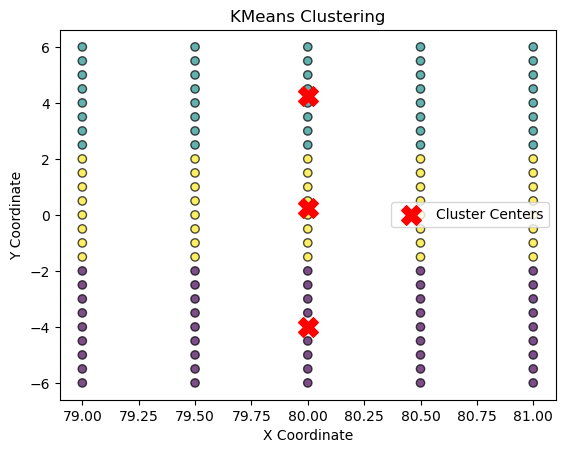

In [141]:
cluster_centers, labels = turbines_cluster(data, 3)


In [55]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
class substation():
    def __init__(self, id, land_cable_type, substation_type):
        self.id = id
        self.land_cable_type = land_cable_type
        self.substation_type = substation_type
    
    def __str__(self):
        return f"{self.id=}, {self.land_cable_type=}, {self.substation_type=}"

    def __repr__(self):
        return self.__str__()

class substation_substation_cable():
    def __init__(self, substation_id, other_substation_id, cable_type):
        self.substation_id = substation_id
        self.other_substation_id = other_substation_id
        self.cable_type = cable_type

    def __str__(self):
        return f"{self.substation_id=}, {self.other_substation_id=}, {self.cable_type=}"

    def __repr__(self):
        return self.__str__()

class turbine():
    def __init__(self, id, substation_id):
        self.id = id
        self.substation_id = substation_id
    
    def __str__(self):
        return f"{self.id=}, {self.substation_id=}"

    def __repr__(self):
        return self.__str__()
    
    def to_dict(self):
        return {'id': self.id, 'substation_id': self.substation_id}

class parser_out():
    def __init__(self, instance_name, substations, substation_substation_cables, turbines):
        self.instance_name = instance_name
        self.folder_out = "instance_arrive/"
        self.substations = substations
        self.substation_substation_cables = substation_substation_cables
        self.turbines = turbines
    
    def create_json(self):
        dict_out = {
            "substation": self.substations,
            "substation_substation_cables": self.substation_substation_cables,
            "turbines": self.turbines
            }

        with open(f"{self.folder_out}/{self.instance_name}_out.json", "w+") as f:
            json.dump(dict_out, f)


def distance(substation1, substation2):
    #distance squared
    return (substation2['x'] - substation1['x'])**2 + (substation2['y'] - substation1['y'])**2

def get_substation(id, substation_list):
    for substation in substation_list:
        if substation['id'] == id:
            return substation
    raise ValueError(f"substation {id} not found")

